**1.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [3]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Filling the missing values

In [5]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

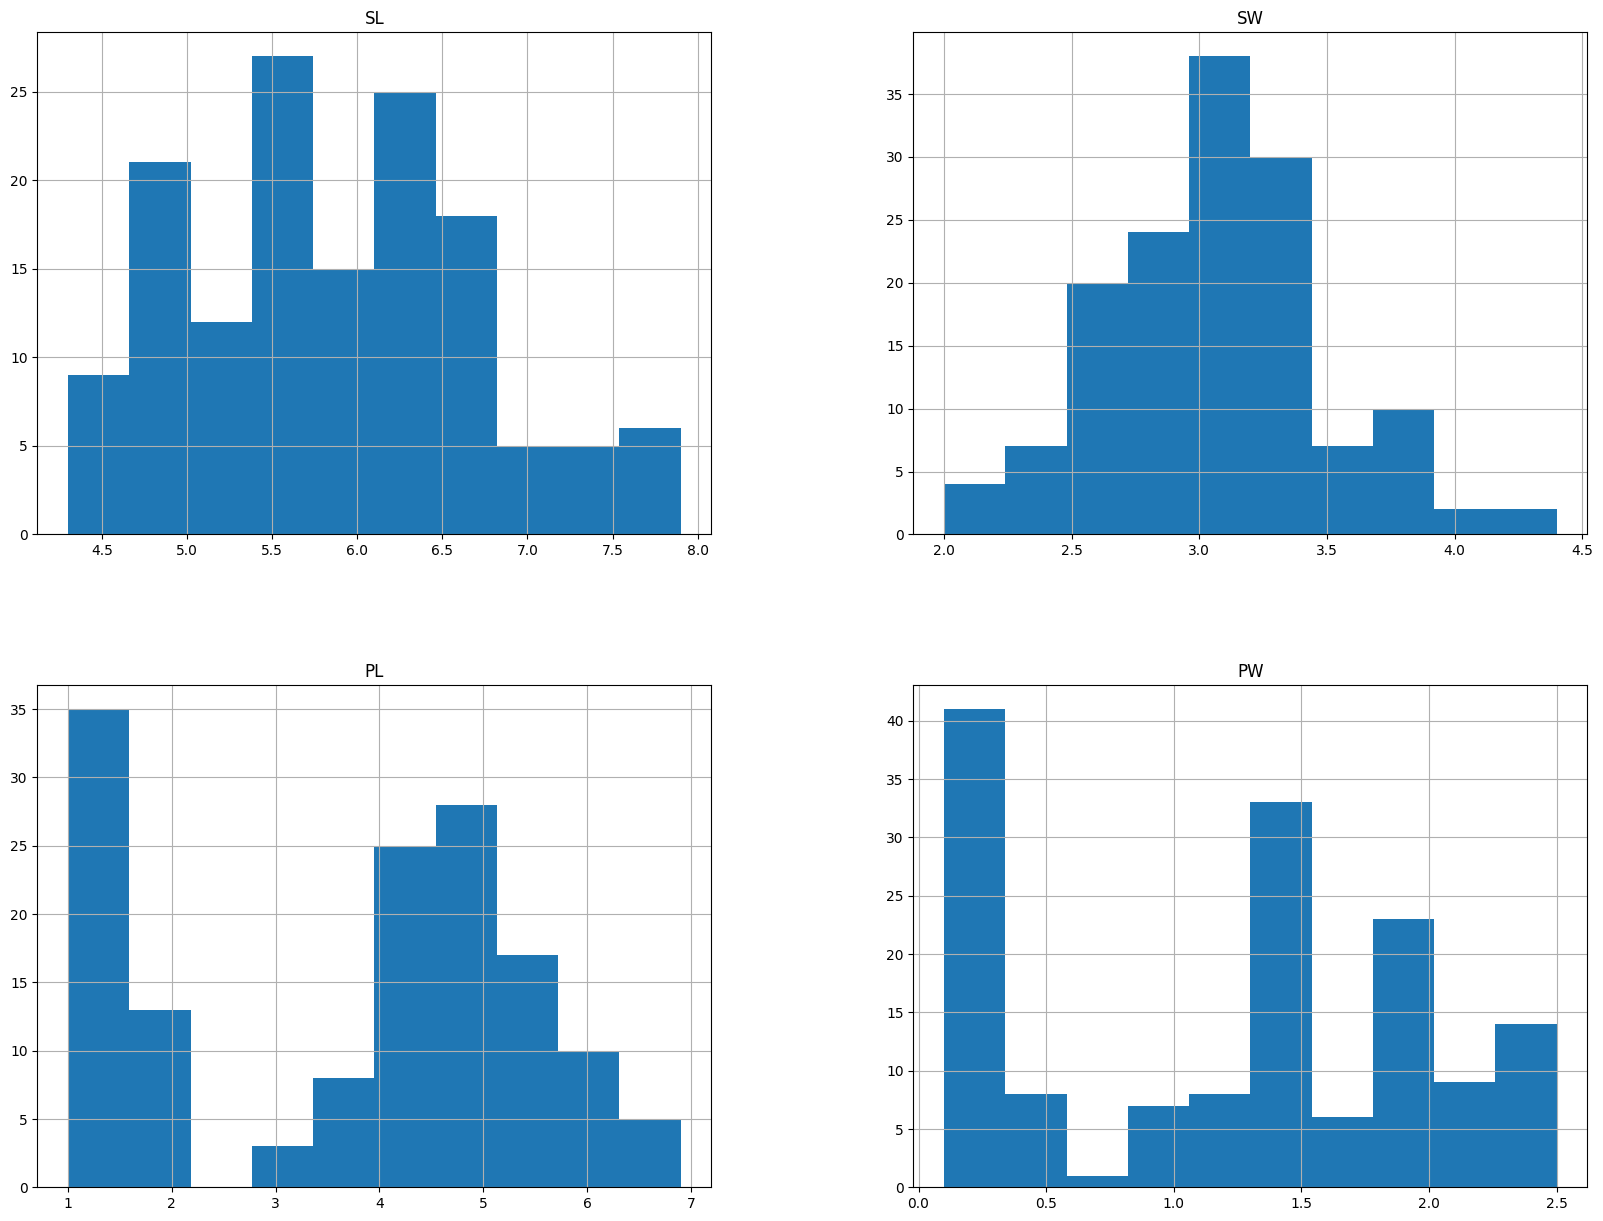

In [6]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [7]:
data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Outlier detection

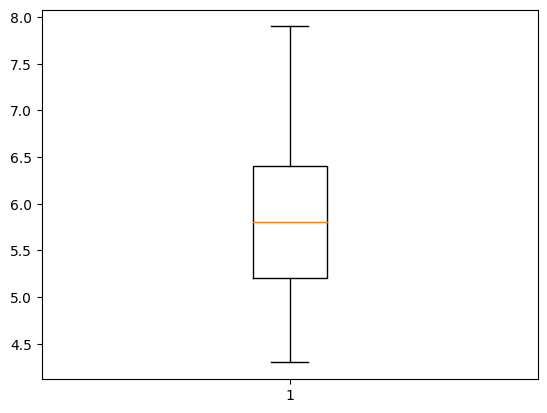

In [9]:
plt.boxplot(data['SL'])
plt.show()

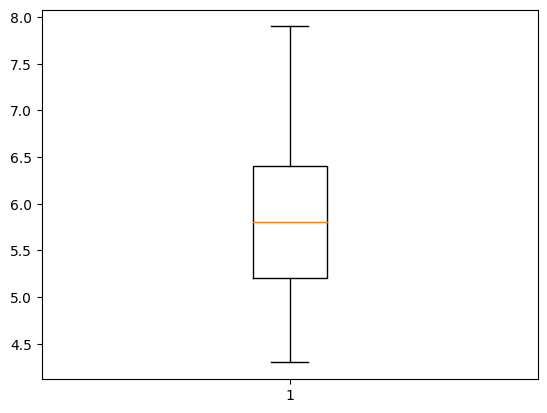

In [10]:
plt.boxplot(data['SL'])
plt.show()

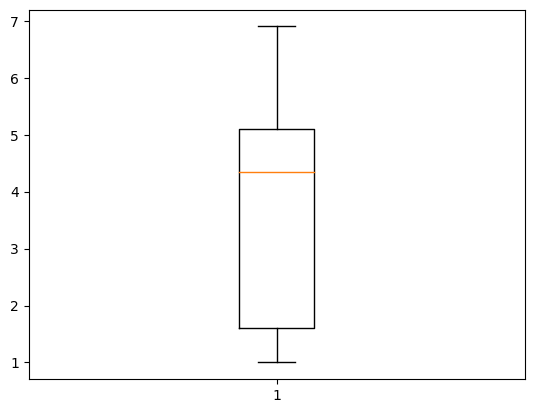

In [11]:
plt.boxplot(data['PL'])
plt.show()

<Axes: xlabel='SL', ylabel='SW'>

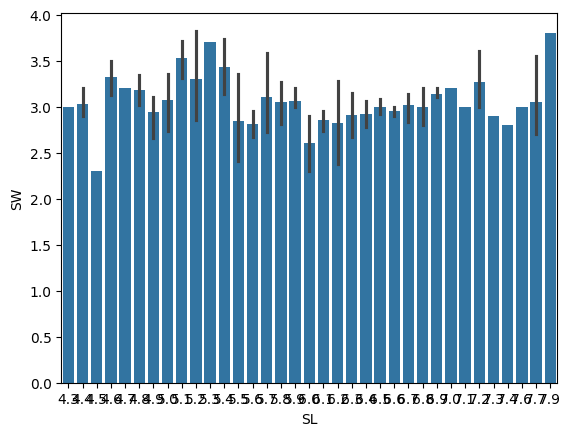

In [16]:
sns.barplot(x="SL",y="SW",data=data)

<Axes: xlabel='SL', ylabel='SW'>

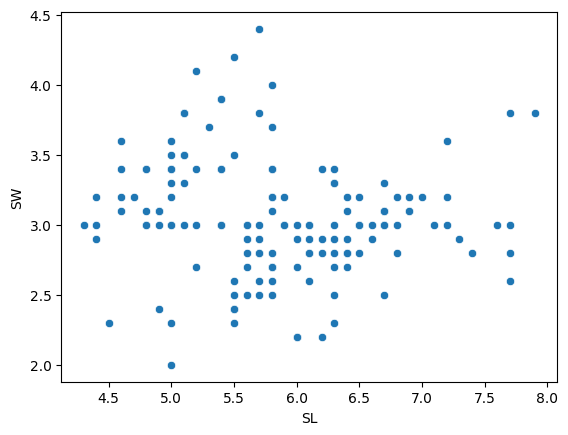

In [17]:
sns.scatterplot(x='SL',y='SW',data=data)

In [27]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
data['Classification'].replace({'Iris-setosa':'1', 'Iris-versicolor':'2', 'Iris-virginica':'3'}, inplace = True)

In [70]:
y = data['Classification']
X = data.drop(['Classification'],axis=1)

In [31]:
y = data['Classification']
X = data.drop(['Classification'],axis=1)

In [32]:
X.shape

(150, 4)

In [33]:
y.shape

(150,)

In [34]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(150, 1)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [38]:
from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_predictions = ln_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Eroor of the model is ", mean_squared_error(y_predictions,y_test))
print("Mean Absolute Eroor of the model is ", mean_absolute_error(y_predictions,y_test))
print("R2 score of the model is ", r2_score(y_predictions,y_test))


Mean Squared Eroor of the model is  0.05512346442085813
Mean Absolute Eroor of the model is  0.17311752327634794
R2 score of the model is  0.946297137326936


In [41]:
X1 = data[['SL']]
y1 = data['Classification']

ln_model2 = LinearRegression().fit(X1,y1)


In [42]:
coeficient = ln_model2.coef_[0]
intercept = ln_model2.intercept_

print("Coefficient: ",coeficient)
print("intercept: ",intercept)

Coefficient:  0.7842868874897343
intercept:  -2.590692581439912


In [43]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_predictions_dt = dt_model.predict(X_test)

In [44]:
print("Mean Squared Eroor of the model is ", mean_squared_error(y_predictions_dt,y_test))
print("Mean Absolute Eroor of the model is ", mean_absolute_error(y_predictions_dt,y_test))
print("R2 score of the model is ", r2_score(y_predictions_dt,y_test))


Mean Squared Eroor of the model is  1.314768175368353e-32
Mean Absolute Eroor of the model is  5.921189464667501e-17
R2 score of the model is  1.0


In [71]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,5.8,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [72]:
data['Classification'].value_counts()

Classification
1    50
2    50
3    50
Name: count, dtype: int64

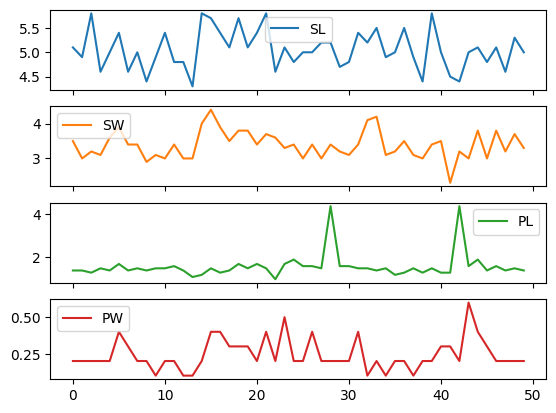

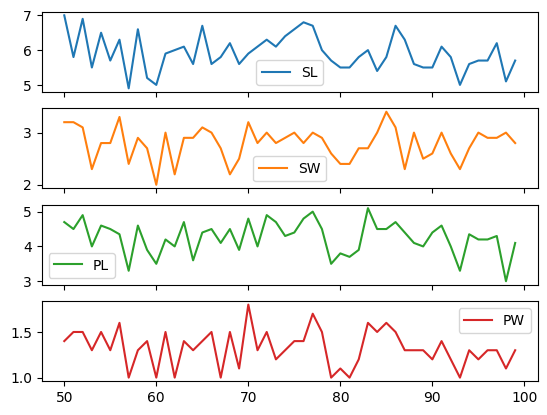

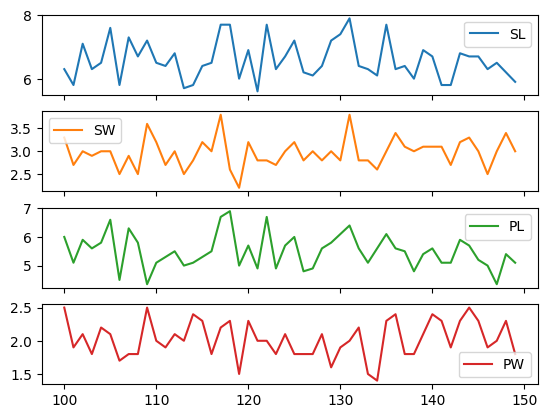

In [73]:
class_group = data.groupby('Classification')
class_group.plot(subplots=True)
plt.show()

In [74]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [77]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['3', '1', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '1',
       '2', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '2', '3',
       '2', '1', '2', '3'], dtype=object)

In [82]:
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score,f1_score,precision_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 is', f1_score(y_test, y_pred,average='micro'))


Accuracy is 0.9333333333333333
Precision is 0.9333333333333333
Recall is 0.9333333333333333
F1 is 0.9333333333333333


In [83]:
confusion_matrix(y_test,y_pred)

array([[10,  1,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=100)
from sklearn.neighbors import KNeighborsClassifier as KNN
classifier = KNN(n_neighbors=7)
classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k


[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

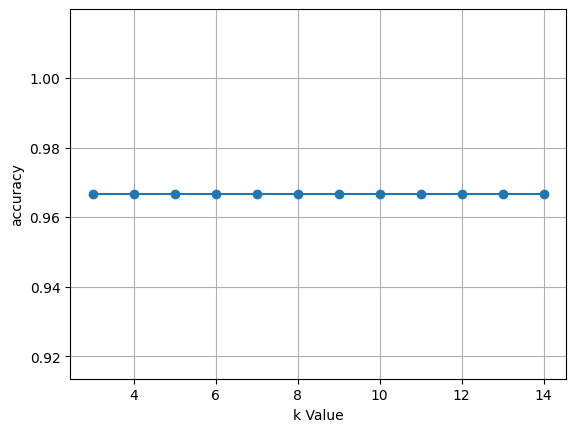

In [85]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [87]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='micro'))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9666666666666667
F1 Score is 0.9666666666666667


In [102]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [103]:
print(confusion_matrix(y_test,y_svm_prediction))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [104]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.9666666666666667


In [105]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='poly')
svm_clf.fit(X_train, y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [92]:
print(confusion_matrix(y_test,y_svm_prediction))

[[10  1  0]
 [ 0  5  1]
 [ 0  0 13]]


In [106]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.9333333333333333


In [93]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [94]:
print(confusion_matrix(y_test,y_svm_prediction))

[[10  1  0]
 [ 0  5  1]
 [ 0  0 13]]


In [101]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.9333333333333333


In [107]:
from sklearn.tree import DecisionTreeClassifier
ds_clf = DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [108]:
y_pred_dt = ds_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred_dt))

[[10  1  0]
 [ 0  6  0]
 [ 0  0 13]]
accuracy score 0.9666666666666667


In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
y_pred_rf = rf_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print("accuracy score",accuracy_score(y_test,y_pred_rf))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]
accuracy score 0.9666666666666667


 DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier gives accuracy score of 0.9666666666666667

DecisionTreeRegressor -

Mean Squared Eroor of the model is  1.314768175368353e-32

Mean Absolute Eroor of the model is  5.921189464667501e-17

R2 score of the model is  1.0